In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# IMPORT

In [232]:
dt = pd.read_csv('winequality.csv', sep=";");
dt.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
type,6497,2,White,4898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fixed acidity,6497,NaN,NaN,NaN,7.21531,1.29643,3.8,6.4,7,7.7,15.9
volatile acidity,6497,NaN,NaN,NaN,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497,NaN,NaN,NaN,0.318633,0.145318,0,0.25,0.31,0.39,1.66
residual sugar,6497,NaN,NaN,NaN,5.44324,4.7578,0.6,1.8,3,8.1,65.8
chlorides,6497,NaN,NaN,NaN,0.0560339,0.0350336,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497,NaN,NaN,NaN,30.5253,17.7494,1,17,29,41,289
total sulfur dioxide,6497,NaN,NaN,NaN,115.745,56.5219,6,77,118,156,440
density,6497,NaN,NaN,NaN,1.71088,7.63609,0.98711,0.99234,0.99489,0.99699,103.898
pH,6497,NaN,NaN,NaN,3.2185,0.160787,2.72,3.11,3.21,3.32,4.01


# CLEANING

* train/set: regular train_test_split
* NAs NO NEED (IMPUTER si besoin)
* alcohol broken: regexp
* density > 1
* Outliers: sulphates, total sulfur dioxide, free sulfur dioxide, fixed acidity, volatile acidity, citric acid,
 residual sugar, chlorides, alcohol
* scale continuous: scaler
* bin discrete values

### Alcohol and density

In [233]:
dt.loc[dt.alcohol.str.match('[0-9]+\.+[0-9]+\.+'),'alcohol'] = dt.loc[dt.alcohol.str.match('[0-9]+\.+[0-9]+\.+'),:]['alcohol'].apply(lambda x: x.split('.')[0]).map(lambda x: int(x)/10)
dt.alcohol = dt['alcohol'].map(float)
dt.alcohol.describe()

count    6497.000000
mean       10.597477
std         3.214091
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        97.300000
Name: alcohol, dtype: float64

In [234]:
dt = dt.loc[dt.density<=1,:]

### OUTLIERS

In [235]:
def inliner(row):
    return np.vstack([row < row.quantile(0.99), row > row.quantile(0.01)]).all(axis = 0)
outl_col = ["sulphates", "total sulfur dioxide","free sulfur dioxide",
            "fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","alcohol"]
dt = dt.loc[dt.loc[:,outl_col].apply(inliner ,axis = 0).all(axis = 1),:]

In [237]:
dt.head().T

,1,2,3,4,5
type,White,White,White,White,White
fixed acidity,6.3,8.1,7.2,7.2,8.1
volatile acidity,0.3,0.28,0.23,0.23,0.28
citric acid,0.34,0.4,0.32,0.32,0.4
residual sugar,1.6,6.9,8.5,8.5,6.9
chlorides,0.049,0.05,0.058,0.058,0.05
free sulfur dioxide,14,30,47,47,30
total sulfur dioxide,132,97,186,186,97
density,0.994,0.9951,0.9956,0.9956,0.9951
pH,3.3,3.26,3.19,3.19,3.26


### DUMMIES

In [238]:
dt = pd.get_dummies(dt);dt.head().T

,1,2,3,4,5
fixed acidity,6.300,8.1000,7.2000,7.2000,8.1000
volatile acidity,0.300,0.2800,0.2300,0.2300,0.2800
citric acid,0.340,0.4000,0.3200,0.3200,0.4000
residual sugar,1.600,6.9000,8.5000,8.5000,6.9000
chlorides,0.049,0.0500,0.0580,0.0580,0.0500
free sulfur dioxide,14.000,30.0000,47.0000,47.0000,30.0000
total sulfur dioxide,132.000,97.0000,186.0000,186.0000,97.0000
density,0.994,0.9951,0.9956,0.9956,0.9951
pH,3.300,3.2600,3.1900,3.1900,3.2600
sulphates,0.490,0.4400,0.4000,0.4000,0.4400


### SCALER

In [80]:
from sklearn.preprocessing import StandardScaler

In [239]:
dt.drop(columns = 'quality', axis = 1).select_dtypes(include = 'float')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0
10,8.1,0.270,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,0.56,12.0
11,8.6,0.230,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,0.53,9.7


In [242]:
scaler = StandardScaler()
x = scaler.fit_transform(dt.drop(columns = 'quality', axis = 1).select_dtypes(include = 'float'));x

array([[-0.79875216, -0.18085402,  0.21706376, ...,  0.53198624,
        -0.27094021, -0.88558495],
       [ 0.94020495, -0.31923667,  0.71106106, ...,  0.27251864,
        -0.67818405, -0.35135186],
       [ 0.07072639, -0.66519329,  0.05239799, ..., -0.18154967,
        -1.00397912, -0.52942956],
       ...,
       [-0.79875216,  1.2721638 , -1.51192681, ...,  1.31038906,
         1.84672775,  0.44999776],
       [-1.18518707,  2.20624668, -1.59425969, ...,  2.28339258,
         1.52093267, -0.26231302],
       [-1.08857835, -0.11166269,  1.28739125, ...,  1.11578835,
         1.11368884,  0.44999776]])

In [244]:
xd = pd.DataFrame(x, index= dt.index, columns = dt.drop(columns = 'quality', axis = 1).select_dtypes(include = 'float').columns);xd

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,-0.798752,-0.180854,0.217064,-0.844997,-0.163835,-1.049231,0.262400,-0.180788,0.531986,-0.270940,-0.885585
2,0.940205,-0.319237,0.711061,0.361591,-0.119471,-0.034692,-0.405736,0.226360,0.272519,-0.678184,-0.351352
3,0.070726,-0.665193,0.052398,0.725845,0.235439,1.043256,1.293238,0.411428,-0.181550,-1.003979,-0.529430
4,0.070726,-0.665193,0.052398,0.725845,0.235439,1.043256,1.293238,0.411428,-0.181550,-1.003979,-0.529430
5,0.940205,-0.319237,0.711061,0.361591,-0.119471,-0.034692,-0.405736,0.226360,0.272519,-0.678184,-0.351352
6,-0.895361,-0.042471,-1.264928,0.384357,-0.341290,-0.034692,0.338758,0.152333,-0.246417,-0.433838,-0.796546
8,-0.798752,-0.180854,0.217064,-0.844997,-0.163835,-1.049231,0.262400,-0.180788,0.531986,-0.270940,-0.885585
9,0.940205,-0.734385,0.958060,-0.867763,-0.385654,-0.161509,0.205131,-0.254815,0.013051,-0.596735,0.449998
10,0.940205,-0.388428,0.793394,-0.879146,-0.873656,-1.239457,-1.054782,-1.365220,-1.478888,0.299201,1.340386
11,1.423249,-0.665193,0.711061,-0.253086,-0.784928,-0.859005,-0.176661,0.078306,-0.505884,0.054855,-0.707507


In [252]:
#pd.concat([xd, dt.loc[:,['type_Red', 'type_White', 'quality']]])
dt_prepro = xd.join(dt.loc[:,['type_Red', 'type_White', 'quality']])

In [254]:
dt_prepro.head().T

,1,2,3,4,5
fixed acidity,-0.798752,0.940205,0.070726,0.070726,0.940205
volatile acidity,-0.180854,-0.319237,-0.665193,-0.665193,-0.319237
citric acid,0.217064,0.711061,0.052398,0.052398,0.711061
residual sugar,-0.844997,0.361591,0.725845,0.725845,0.361591
chlorides,-0.163835,-0.119471,0.235439,0.235439,-0.119471
free sulfur dioxide,-1.049231,-0.034692,1.043256,1.043256,-0.034692
total sulfur dioxide,0.262400,-0.405736,1.293238,1.293238,-0.405736
density,-0.180788,0.226360,0.411428,0.411428,0.226360
pH,0.531986,0.272519,-0.181550,-0.181550,0.272519
sulphates,-0.270940,-0.678184,-1.003979,-1.003979,-0.678184


# TEST MODEL

In [179]:
from sklearn.linear_model import LinearRegression

In [308]:
lm = LinearRegression()

In [309]:
lm.fit(dt_prepro.drop(columns = 'quality'),dt.quality)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [310]:
y_pred = lm.predict(dt_prepro.drop(columns = 'quality'))

In [311]:
from sklearn.metrics import r2_score

In [312]:
r2_score(dt_prepro.quality, y_pred)

0.28541377537581347

In [313]:
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


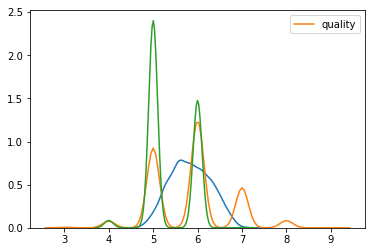

In [314]:
pred= pd.DataFrame({'y_pred':y_pred})
sns.kdeplot(y_pred)
sns.kdeplot(dt_prepro.quality)
sns.kdeplot(y_pred.astype('int'))
#sns.kdeplot(np.round(y_pred).astype('int'))

In [268]:
print(r2_score(dt_prepro.quality, y_pred.astype('int')))
print(r2_score(dt_prepro.quality, np.round(y_pred).astype('int')))

-0.13864438301853266
0.15233653866924546


In [316]:
res = np.abs(dt_prepro.quality - y_pred)

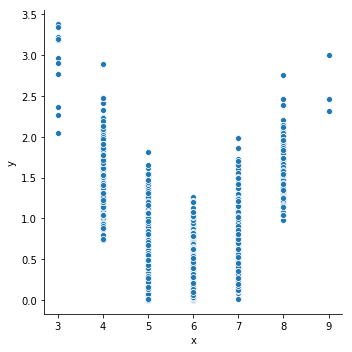

In [322]:
dt_plot = pd.DataFrame({'x':dt_prepro.quality, 'y': res})
sns.relplot(data = dt_plot, x = 'x', y = 'y')

In [269]:
from sklearn.preprocessing import PolynomialFeatures

In [270]:
pol_feat = PolynomialFeatures(3)
x_pol = pol_feat.fit_transform(dt_prepro.drop(columns = 'quality'))

In [271]:
x_pol.shape

(5179, 560)

In [328]:
lm_pol = LinearRegression()
lm_pol.fit(x_pol, dt_prepro.quality)
y_pred = lm_pol.predict(x_pol)

In [329]:
print(r2_score(dt_prepro.quality, y_pred))
print(r2_score(dt_prepro.quality, np.round(y_pred).astype('int')))

0.4605401638195332
0.3510748946094192


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


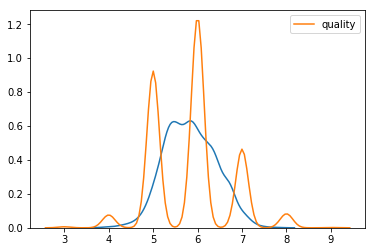

In [330]:
sns.kdeplot(lm_pol.predict(x_pol))
sns.kdeplot(dt_prepro.quality)

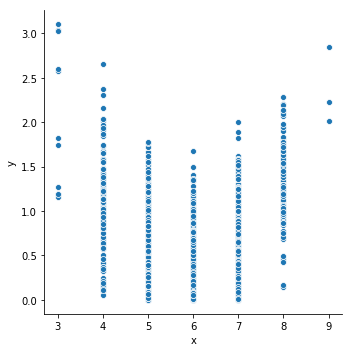

In [331]:
res = np.abs(dt_prepro.quality - lm_pol.predict(x_pol))
dt_plot = pd.DataFrame({'x':dt_prepro.quality, 'y': res})
sns.relplot(data = dt_plot, x = 'x', y = 'y')

1.0
1.0


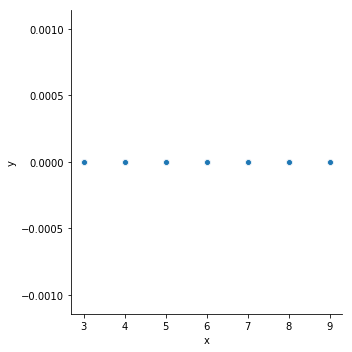

In [337]:
pol_feat = PolynomialFeatures(5)
x_pol = pol_feat.fit_transform(dt_prepro.drop(columns = 'quality'))
lm_pol = LinearRegression()
lm_pol.fit(x_pol, dt_prepro.quality)
y_pred = lm_pol.predict(x_pol)
print(r2_score(dt_prepro.quality, y_pred))
print(r2_score(dt_prepro.quality, np.round(y_pred).astype('int')))
res = np.abs(dt_prepro.quality - y_pred)
dt_plot = pd.DataFrame({'x':dt_prepro.quality, 'y': res})
sns.relplot(data = dt_plot, x = 'x', y = 'y')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


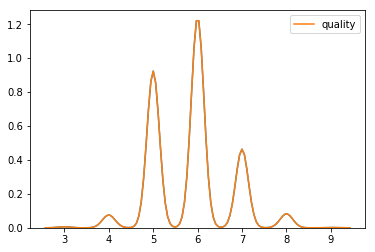

In [338]:
sns.kdeplot(lm_pol.predict(x_pol))
sns.kdeplot(dt_prepro.quality)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


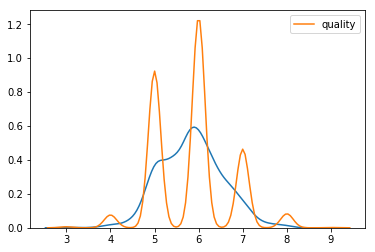

In [336]:
sns.kdeplot(lm_pol.predict(x_pol))
sns.kdeplot(dt_prepro.quality)

In [276]:
from sklearn.ensemble import RandomForestRegressor

In [277]:
rf_model = RandomForestRegressor()

In [339]:
rf_model.fit(dt_prepro.drop(columns = 'quality'), dt_prepro.quality)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [340]:
y_pred = rf_model.predict(dt_prepro.drop(columns = 'quality'))

In [341]:
print(r2_score(y_pred, dt.quality))
print(r2_score(np.round(y_pred), dt.quality))

0.8749629347601846
0.8902171652834333


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


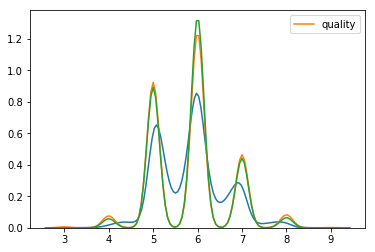

In [342]:
sns.kdeplot(y_pred)
sns.kdeplot(dt_prepro.quality)
sns.kdeplot(np.round(y_pred))

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
train,test = train_test_split(dt_prepro,test_size = .20)

In [345]:
rf_model = RandomForestRegressor()
rf_model.fit(train.drop(columns = 'quality', axis = 1), train.quality)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [346]:
y_pred = rf_model.predict(test.drop(columns = 'quality', axis = 1))

In [347]:
print(r2_score(y_pred, test.quality))
print(r2_score(np.round(y_pred), test.quality))

-0.014335009312439473
0.08513037239117238


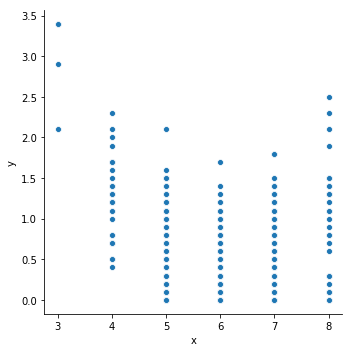

In [349]:
res = np.abs(y_pred-test.quality)
dt_plot = pd.DataFrame({'x':dt.quality, 'y': res})
sns.relplot(data = dt_plot, x = 'x', y = 'y')

In [350]:
from sklearn.metrics import mean_absolute_error

In [351]:
mean_absolute_error(y_pred, test.quality)

0.4466216216216216

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


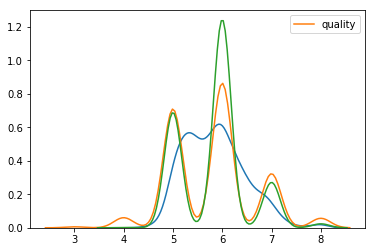

In [289]:
sns.kdeplot(y_pred)
sns.kdeplot(test.quality)
sns.kdeplot(np.round(y_pred))

In [290]:
from sklearn.neighbors import KNeighborsRegressor

In [353]:
knn = KNeighborsRegressor(n_neighbors= 2)
knn.fit(train.drop(columns = 'quality', axis = 1), train.quality)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [354]:
y_pred = knn.predict(test.drop(columns = 'quality', axis = 1))

In [355]:
print(r2_score(y_pred, test.quality))
print(r2_score(np.round(y_pred), test.quality))
print(mean_absolute_error(y_pred, test.quality))

-0.11380048117470531
-0.2749727728163798
0.5164092664092664


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


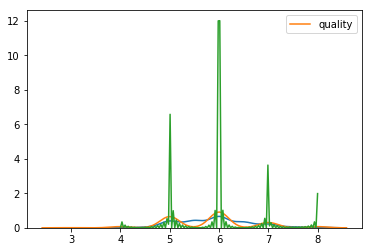

In [356]:
sns.kdeplot(y_pred)
sns.kdeplot(test.quality)
sns.kdeplot(np.round(y_pred))

In [357]:
pd.DataFrame([y_pred, test.quality]).T.head()

,0,1
0,6.0,5.0
1,5.0,5.0
2,6.5,6.0
3,6.5,7.0
4,6.5,6.0
